In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

In [4]:
import scipy.stats as stats

## 1. Get the Data

In [5]:

wine = pd.read_csv(r"wine_clean_dataset_after_EDA.csv" , index_col = 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.shape

(1353, 12)

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,8.310569,0.529970,0.270813,2.515595,0.087375,15.849963,46.331486,0.996711,3.311397,0.655558,10.431941,5.623060
std,1.740485,0.183189,0.193877,1.336413,0.045186,10.424959,32.034659,0.001866,0.153322,0.158402,1.081120,0.822106
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.467000,72.000000,165.000000,1.003690,4.010000,1.620000,14.900000,8.000000


## 2. Normalization of Data

In [8]:
# z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = wine.columns
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
for col in cols2zscore:
    
    mean_val   = np.mean(wine[col])
    std_val    = np.std(wine[col],ddof=1)
    wine[col]  = (wine[col]-mean_val) / std_val

# can also do more compactly
#data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.353000e+03,1.353000e+03,1353.000000,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1.353000e+03,1353.000000
mean,-2.100644e-17,3.203482e-16,0.000000,-1.050322e-17,1.260386e-16,2.100644e-17,1.050322e-16,9.742786e-14,2.100644e-15,-4.568900e-16,-2.100644e-16,5.623060
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.822106
min,-2.131916e+00,-2.237969e+00,-1.396830,-1.208904e+00,-1.668100e+00,-1.424463e+00,-1.258995e+00,-3.558471e+00,-2.944104e+00,-2.055267e+00,-1.879479e+00,3.000000
25%,-6.955354e-01,-7.640783e-01,-0.932618,-4.606323e-01,-3.845285e-01,-8.489207e-01,-7.595363e-01,-5.954288e-01,-6.613316e-01,-6.663941e-01,-8.620150e-01,5.000000
50%,-2.358935e-01,-5.442717e-02,-0.055773,-2.361508e-01,-1.853536e-01,-1.774552e-01,-2.600772e-01,-6.035313e-03,-9.110844e-03,-2.244799e-01,-2.145381e-01,6.000000
75%,5.110247e-01,6.006354e-01,0.821073,6.315790e-02,5.808247e-02,4.940103e-01,5.203275e-01,5.940744e-01,5.778878e-01,4.699567e-01,6.179322e-01,6.000000
max,4.360526e+00,5.731959e+00,2.677921,9.715864e+00,8.401299e+00,5.386116e+00,3.704379e+00,3.739292e+00,4.556434e+00,6.088580e+00,4.132807e+00,8.000000


## 3. Creating Boolean Label

In [9]:
import warnings
warnings.filterwarnings(action = "ignore")

In [10]:
# create a new column for binarized (boolean) quality
wine['boolQuality'] = 0

# Binarizing the column
wine['boolQuality'][wine['quality']>5] = 1

wine[['quality','boolQuality']]

,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1354,6,1
1355,5,0
1356,6,1
1357,5,0


In [11]:
wine['boolQuality'].value_counts()

1    716
0    637
Name: boolQuality, dtype: int64

## 4. Converting Data to tensor 

In [12]:
pred_col = wine.columns.drop(labels = ['quality', 'boolQuality'])
pred_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [13]:
arr_data = wine[pred_col].values

In [14]:
arr_data

array([[-0.52316966,  0.92816676, -1.39682984, ...,  1.2953306 ,
        -0.60326351, -0.95451168],
       [-0.2933487 ,  1.91076068, -1.39682984, ..., -0.72655364,
         0.15430369, -0.58452489],
       [-0.2933487 ,  1.25569806, -1.19051333, ..., -0.3352212 ,
        -0.03508811, -0.58452489],
       ...,
       [-1.38499825,  0.10933849, -0.88103857, ...,  1.36055267,
         0.65934849,  0.71042887],
       [-1.38499825,  0.62792972, -0.77788032, ...,  1.68666303,
         0.34369549, -0.2145381 ],
       [-1.32754301, -1.20078674,  1.0273891 , ...,  0.51266573,
         0.02804249,  0.52543548]])

#### Predictiors or Independent features

In [15]:
data = torch.tensor(arr_data ,dtype = torch.float )
data[:5]

tensor([[-0.5232,  0.9282, -1.3968, -0.4606, -0.2517, -0.4652, -0.3849,  0.5834,
          1.2953, -0.6033, -0.9545],
        [-0.2933,  1.9108, -1.3968,  0.0632,  0.2351,  0.8777,  0.6452,  0.0475,
         -0.7266,  0.1543, -0.5845],
        [-0.2933,  1.2557, -1.1905, -0.1613,  0.1023, -0.0815,  0.2394,  0.1547,
         -0.3352, -0.0351, -0.5845],
        [ 1.6601, -1.3646,  1.4916, -0.4606, -0.2739,  0.1103,  0.4267,  0.6905,
         -0.9874, -0.4770, -0.5845],
        [-0.5232,  0.7098, -1.3968, -0.5355, -0.2739, -0.2734, -0.1976,  0.5834,
          1.2953, -0.6033, -0.9545]])

In [16]:
type(data)

torch.Tensor

#### Labels

In [17]:
arr_label = wine["boolQuality"].values

In [18]:
arr_label

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [19]:
labels = torch.tensor(arr_label ,dtype = torch.float)

In [20]:
labels

tensor([0., 0., 0.,  ..., 1., 0., 1.])

In [21]:
labels[:,None]

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [1.]])

In [22]:
labels = labels[:,None]

## 5. Convert the Data into Tensor Dataset

In [23]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [24]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)


# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
#int(train_data.tensors[0].shape[0]/4) -- Hard-coding is better to avoid huge batches!

# batchsize    = 16 
# train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)
# test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0]) 

In [25]:
# for X,y in train_loader:
#     print(X.shape,y.shape)

In [26]:
# for X,y in test_loader:
#     print(X.shape,y.shape)

## 6. Custom Class for ANN model

In [27]:
# create a class for the model

class ANNwine(nn.Module):
    
    def __init__(self):
        super().__init__()

        ### input layer
        self.input = nn.Linear(11,16)

        ### hidden layers(fc : Fully Connected)
        self.fc1 = nn.Linear(16,32) 
        self.fc2 = nn.Linear(32,32)

        ### output layer
        self.output = nn.Linear(32,1)

    # forward pass
    def forward(self,x):
        
        x = F.relu( self.input(x) )
        x = F.relu( self.fc1(x) ) # fully connected
        x = F.relu( self.fc2(x) )
        
        return self.output(x)

## 7. Custom Train Model Function

In [28]:
# a function that trains the model
def trainTheModel(Model, train_loader , test_loader ,LR ,epochs):

    # loss function and optimizer
    lossfunc = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(Model.parameters(),lr=LR)

    # initialize losses
    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):

        # switch on training mode
        Model.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        for X,y in train_loader:

            # forward pass and loss
            yHat_train = Model(X)
            #print("Y predicted : " , yHat_train.shape)
            #print("Y Actual : " ,y.shape)
            
            loss = lossfunc(yHat_train,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute training accuracy for this batch
            batchAcc.append( 100*torch.mean( ( (yHat_train>0) == y ).float() ).item() )
            # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # and get average losses across the batches
        losses[epochi] = np.mean(batchLoss)
    
        # ****** TESTING *******
        Model.eval()
        
        # extract X,y from test dataloader
        X,y = next(iter(test_loader)) 
        
        with torch.no_grad(): # deactivates autograd
            yHat_test = Model(X)
            
        # test accuracy    
        testAcc.append( 100*torch.mean( ( (yHat_test>0) == y ).float() ).item() )
  
    # function output for each iteration(epoch)
    return trainAcc,testAcc,losses

## 8. Parametric Experiment

In [29]:
import time

In [30]:
# This cell takes ~15 mins
numepochs = 1000
LR = 0.01
# Range of batch sizes : [1,3,5,7]
batchsizes = 2**np.arange(1,8,2)

# initialize output results matrices
accuracyResultsTrain = np.zeros((numepochs,len(batchsizes)))
accuracyResultsTest  = np.zeros((numepochs,len(batchsizes)))
comptime             = np.zeros(len(batchsizes))


# test data doesn't vary by training batch size
test_batch_size = test_data.tensors[0].shape[0]
test_loader     = DataLoader(test_data, batch_size = test_batch_size) 

# loop over batch sizes
for bi in range(len(batchsizes)):

    # start the clock!
    starttime = time.process_time()

    # create dataloader object
    train_loader = DataLoader(train_data,
                              batch_size = int(batchsizes[bi]), 
                              shuffle=True, 
                              drop_last=True)
    
    
    # create and train a model
    ANN_wine_model = ANNwine()    
    trainAcc,testAcc,losses = trainTheModel(Model = ANN_wine_model,
                                            train_loader = train_loader ,
                                            test_loader = test_loader,
                                            LR = LR,
                                            epochs = numepochs )

    # store data
    accuracyResultsTrain[:,bi] = trainAcc
    accuracyResultsTest[:,bi]  = testAcc

    # check the timer
    comptime[bi] = time.process_time() - starttime


## 9. Results Visualization

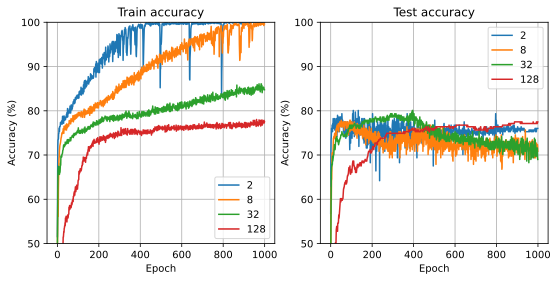

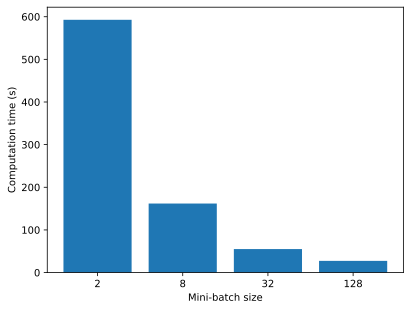

In [35]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(9,4))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# common features
for i in range(2):
    
    ax[i].legend(batchsizes)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_ylim([50,100])
    ax[i].grid()

plt.show()


# bar plot of computation time
plt.bar(range(len(comptime)),comptime,tick_label=batchsizes)
plt.xlabel('Mini-batch size')
plt.ylabel('Computation time (s)')
plt.show()